<a href="https://colab.research.google.com/github/PrincetonUniversity/python_machine_learning/blob/main/notebook1_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
qualitiative_colors = ['#1b9e77','#d95f02','#7570b3','#e7298a']

# *Regression*

## Load Diabetes Data Set

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
# Load the diabetes dataset
diabetes_bunch = load_diabetes()
diabetes_X = diabetes_bunch.data
diabetes_y = diabetes_bunch.target

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [4]:
print(diabetes_bunch.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Text(0, 0.5, 'quantitative measure of diabetes progression')

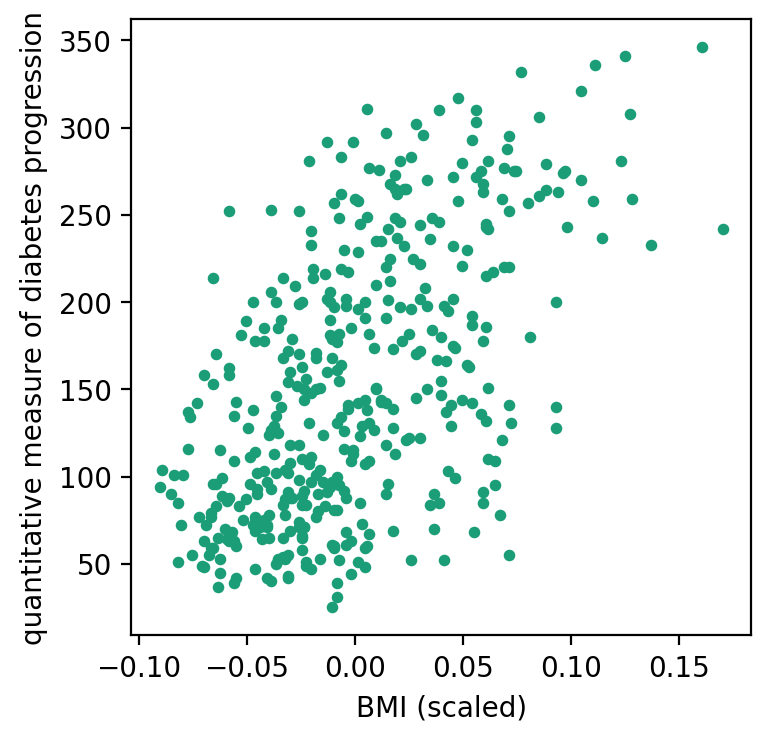

In [5]:
fig, axs = plt.subplots(figsize=(4.,4.), nrows=1, ncols=1, facecolor='white', dpi=200)
axs.scatter(diabetes_X_train, diabetes_y_train, color=qualitiative_colors[0], s=10)
axs.set_xlabel('BMI (scaled)')
axs.set_ylabel('quantitative measure of diabetes progression')

## Linear Regression



In [6]:
from sklearn.linear_model import LinearRegression

### Create linear regression object

In [7]:
regr = LinearRegression()

### Train the model using the training set



In [8]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

### Output the best fit values

In [9]:
print("Intercept: \n", regr.intercept_)
print("Coefficients: \n", regr.coef_)

Intercept: 
 152.91886182616113
Coefficients: 
 [938.23786125]


Text(0, 0.5, 'quantitative measure of diabetes progression')

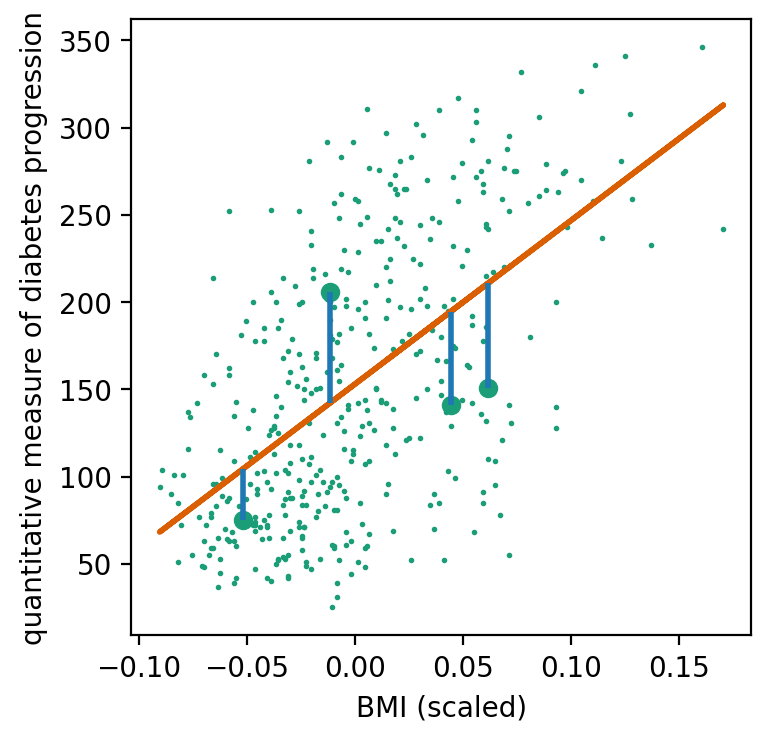

In [10]:
fig, axs = plt.subplots(figsize=(4.,4.), nrows=1, ncols=1, facecolor='white', dpi=200)
axs.scatter(diabetes_X_train, diabetes_y_train, s=1, color=qualitiative_colors[0])
axs.plot(diabetes_X_train, regr.predict(diabetes_X_train), color=qualitiative_colors[1], linewidth=2)
axs.scatter(diabetes_X_train[:4], diabetes_y_train[:4], color=qualitiative_colors[0])
axs.vlines(diabetes_X_train[:4], regr.intercept_ + regr.coef_[0]*diabetes_X_train[:4], diabetes_y_train[:4], lw=2)
axs.set_xlabel('BMI (scaled)')
axs.set_ylabel('quantitative measure of diabetes progression')

### Make predictions using the test set

In [11]:
diabetes_y_pred_linear = regr.predict(diabetes_X_test)

Text(0, 0.5, 'truth - model')

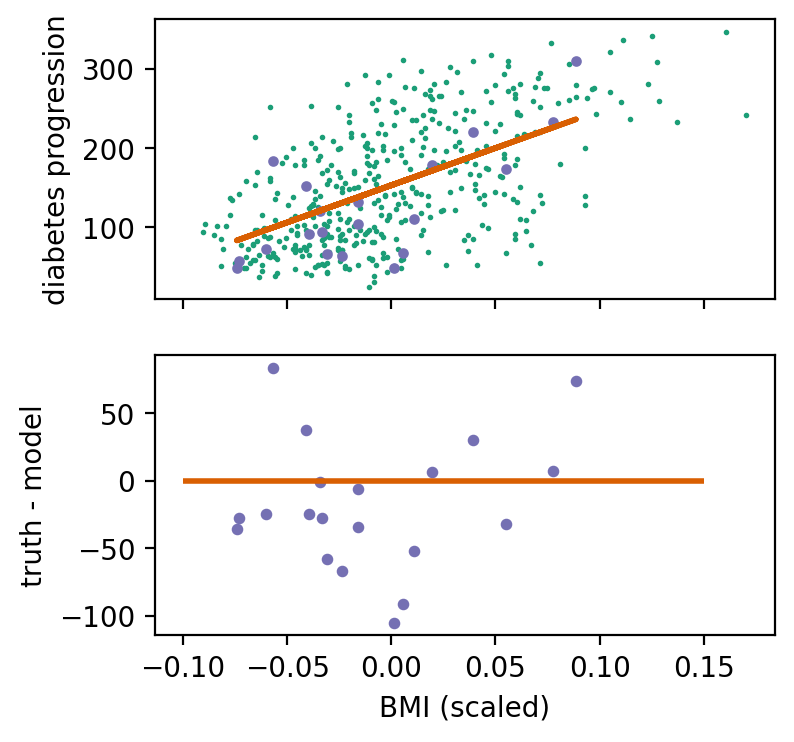

In [12]:
fig, axs = plt.subplots(figsize=(4.,4.), nrows=2, ncols=1, facecolor='white', dpi=200, sharex=True)
axs[0].scatter(diabetes_X_train, diabetes_y_train, s=1, color=qualitiative_colors[0])
axs[0].plot(diabetes_X_test, diabetes_y_pred_linear, color=qualitiative_colors[1], linewidth=2)
axs[0].scatter(diabetes_X_test, diabetes_y_test, color=qualitiative_colors[2], s=8)
axs[1].hlines(0, -0.1, 0.15, color=qualitiative_colors[1], linewidth=2)
axs[1].scatter(diabetes_X_test, diabetes_y_test-diabetes_y_pred_linear, color=qualitiative_colors[2], s=10)
axs[1].set_xlabel('BMI (scaled)')
axs[0].set_ylabel('diabetes progression')
axs[1].set_ylabel('truth - model')

## Create Periodic Data Set

In [13]:
X = np.linspace(start=0, stop=2.*np.pi, num=1000).reshape(-1, 1)
y_base = np.squeeze(np.sin(X))

noise_std = 0.5
y = y_base + rng.normal(loc=0.0, scale=noise_std, size=y_base.shape)

training_indices = rng.choice(np.arange(y.size), size=10, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

Text(0.5, 0, 'x')

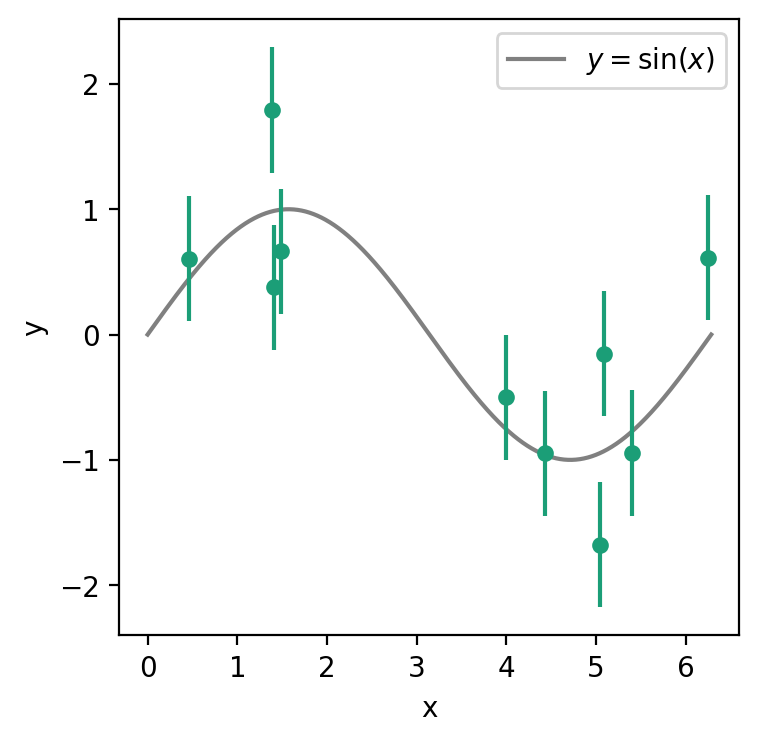

In [14]:
fig, axs = plt.subplots(figsize=(4.,4.), nrows=1, ncols=1, facecolor='white', dpi=200, sharex=True)
axs.plot(X, y_base, color="gray", label = r"$y = \sin(x)$")
axs.errorbar(X_train, y_train, noise_std, linestyle="None", color=qualitiative_colors[0], marker=".", markersize=10)
axs.legend()
axs.set_ylabel('y')
axs.set_xlabel('x')

## Gaussian Process Regression

In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor

### Create kernel object

In [16]:
from sklearn.gaussian_process.kernels import RBF
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-4, 1e2))

### Create Gaussian Process object

In [17]:
gaussian_process = GaussianProcessRegressor(kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9)

### Train the model using the training set

In [18]:
gaussian_process.fit(X_train, y_train)

GaussianProcessRegressor(alpha=0.25, kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=9)

### Make predictions

In [19]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

Text(0, 0.5, 'truth - model')

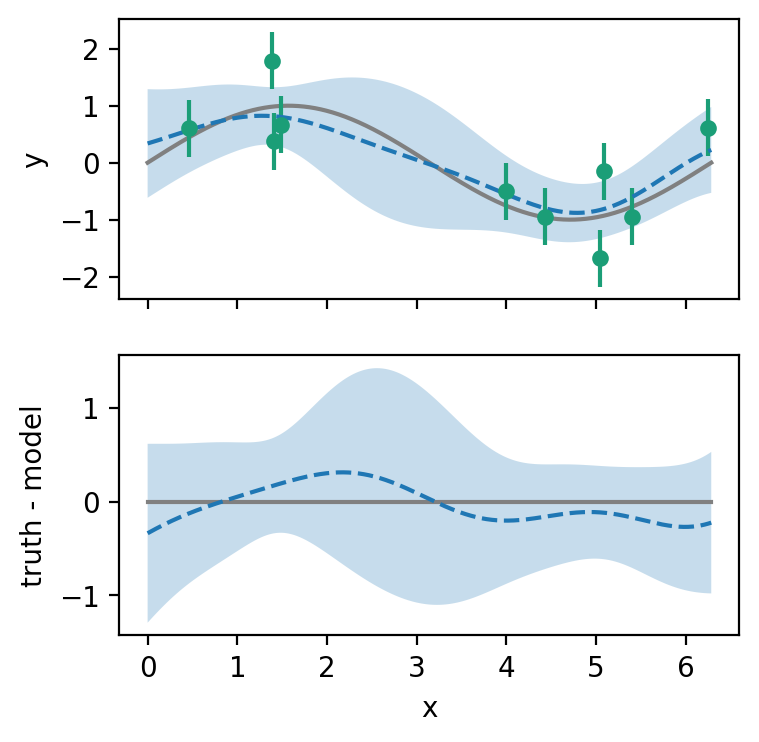

In [20]:
fig, axs = plt.subplots(figsize=(4.,4.), nrows=2, ncols=1, facecolor='white', dpi=200, sharex=True)
axs[0].plot(X, y_base, color="gray")
axs[0].errorbar(X_train, y_train, noise_std, linestyle="None", color=qualitiative_colors[0], marker=".", markersize=10)
axs[0].plot(X, mean_prediction, ls='--')
axs[0].fill_between(X.ravel(), mean_prediction - 1.96 * std_prediction, mean_prediction + 1.96 * std_prediction, alpha=0.25)
axs[0].set_ylabel('y')
axs[1].set_xlabel('x')
axs[1].plot(X, np.zeros(X.shape), color="gray")
axs[1].plot(X, y_base-mean_prediction, ls='--')
axs[1].fill_between(X.ravel(), (y_base-mean_prediction) - 1.96 * std_prediction, (y_base-mean_prediction) + 1.96 * std_prediction, alpha=0.25)
axs[1].set_ylabel('truth - model')